<a href="https://colab.research.google.com/github/ashfaque1704081/Python-Paid-Lab-Work/blob/main/Lab_09_Updated_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-44-a20ff731aeb2>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


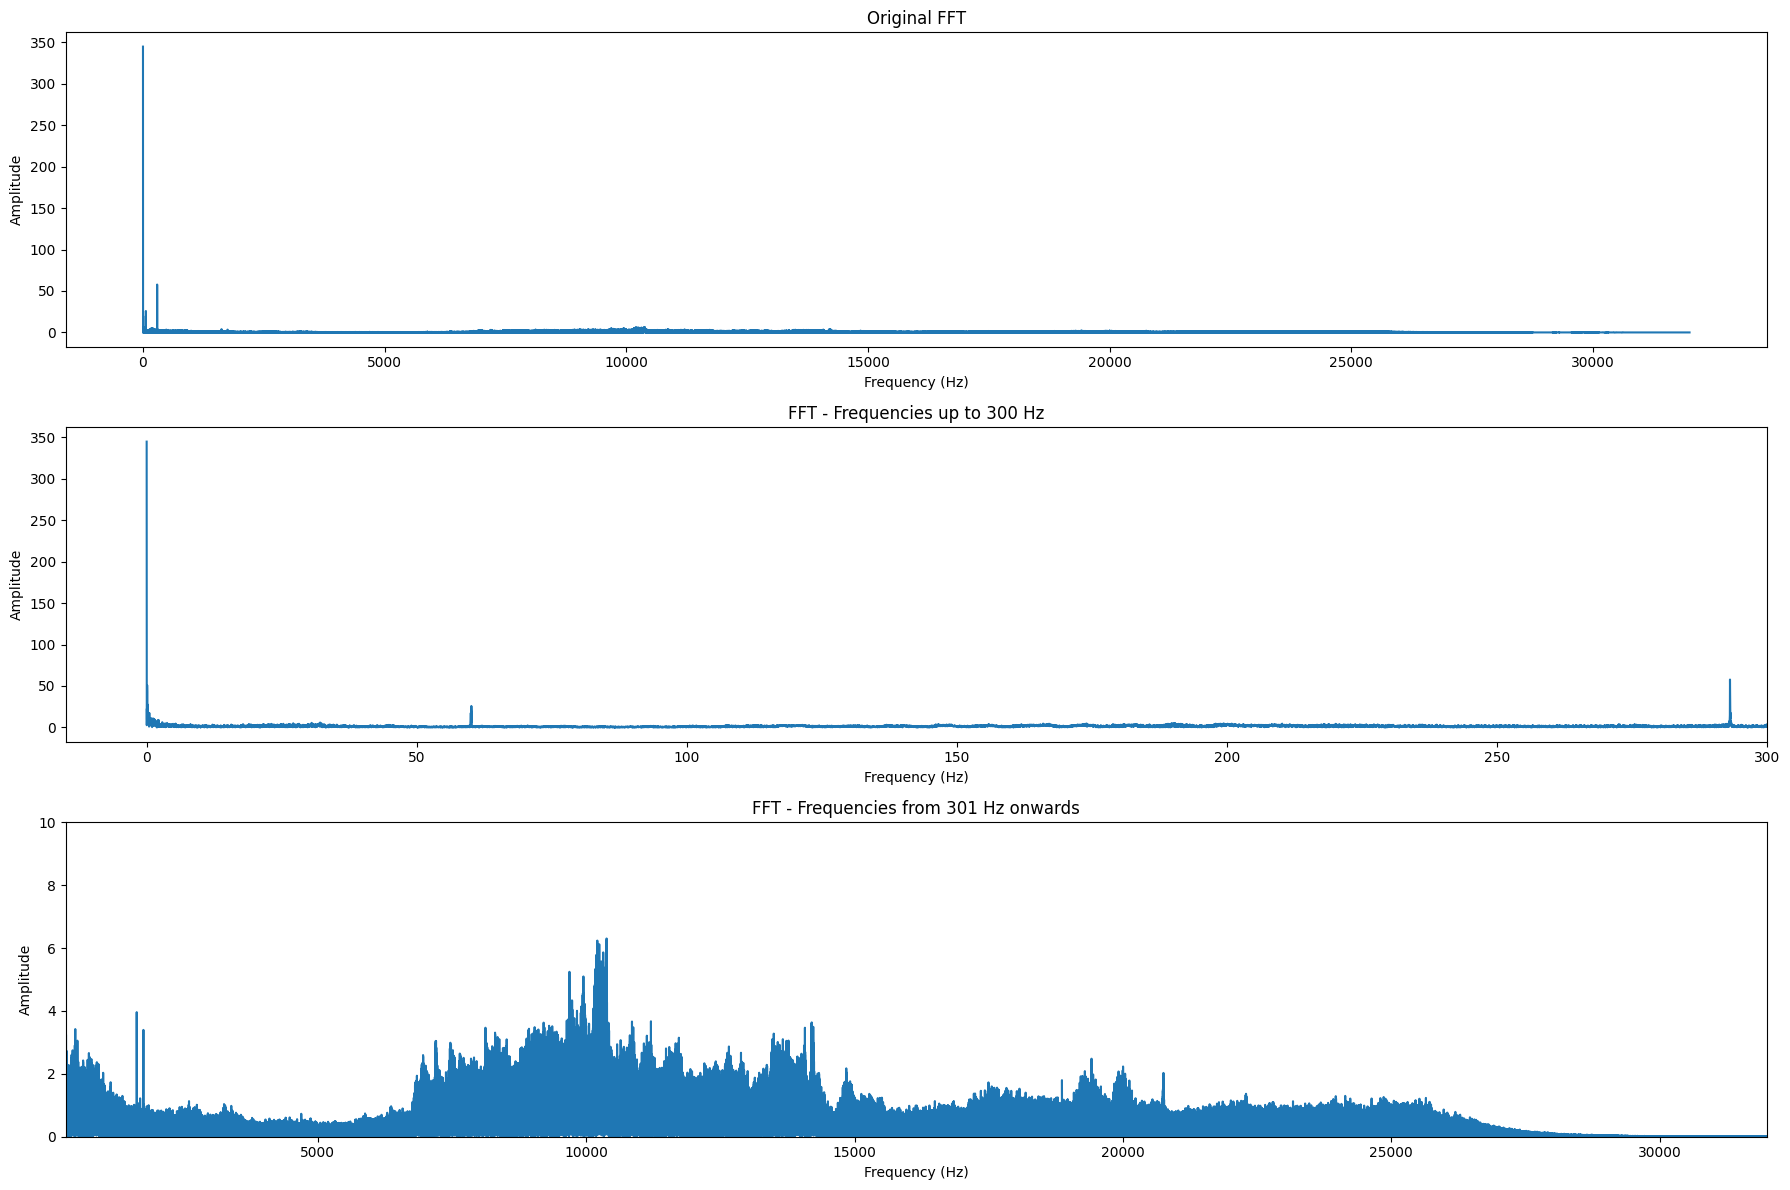

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
file_path = '/content/drive/MyDrive/hydrophone_data32.wav'
sample_rate, data = wavfile.read(file_path)

# Calculate the FFT (Fast Fourier Transform)
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(fft_result), 1/sample_rate)

# Plot the FFT
plt.figure(figsize=(18, 12))

# Original FFT subplot
plt.subplot(3, 1, 1)
plt.title("Original FFT")
plt.plot(fft_freq[:len(fft_result)//2], np.abs(fft_result[:len(fft_result)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

# Subplot for frequencies up to 300 Hz
plt.subplot(3, 1, 2)
plt.title("FFT - Frequencies up to 300 Hz")
plt.plot(fft_freq[:len(fft_result)//2], np.abs(fft_result[:len(fft_result)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(-15, 300)

# Subplot for frequencies from 301 Hz onwards
plt.subplot(3, 1, 3)
plt.title("FFT - Frequencies from 301 Hz onwards")
plt.plot(fft_freq[:len(fft_result)//2], np.abs(fft_result[:len(fft_result)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(301, max(fft_freq[:len(fft_result)//2]))
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

<ipython-input-16-d61b94ec4518>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


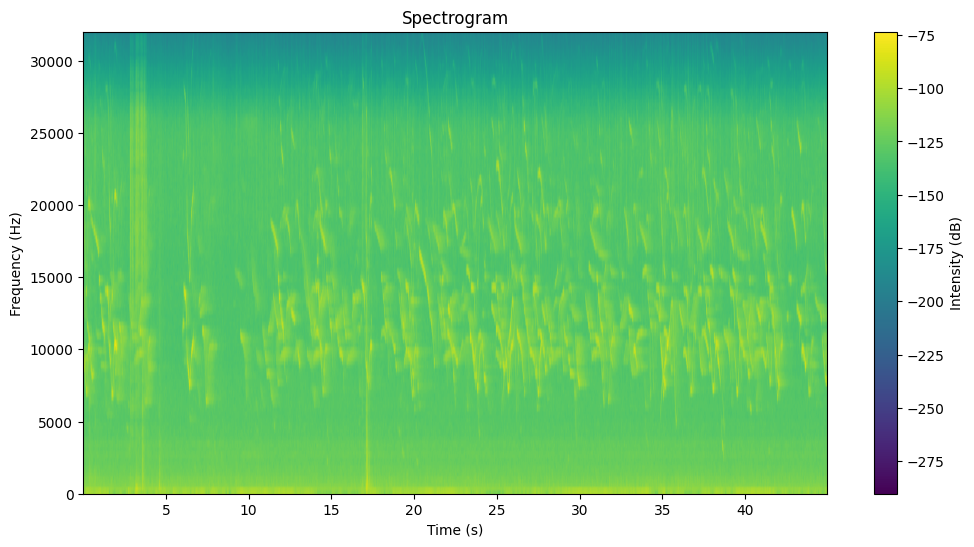

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

file_path = '/content/drive/MyDrive/hydrophone_data32.wav'
sample_rate, data = wavfile.read(file_path)

plt.figure(figsize=(12, 6))
plt.specgram(data, Fs=sample_rate, cmap='viridis', aspect='auto')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.show()

<ipython-input-2-eccb5213fe6c>:33: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


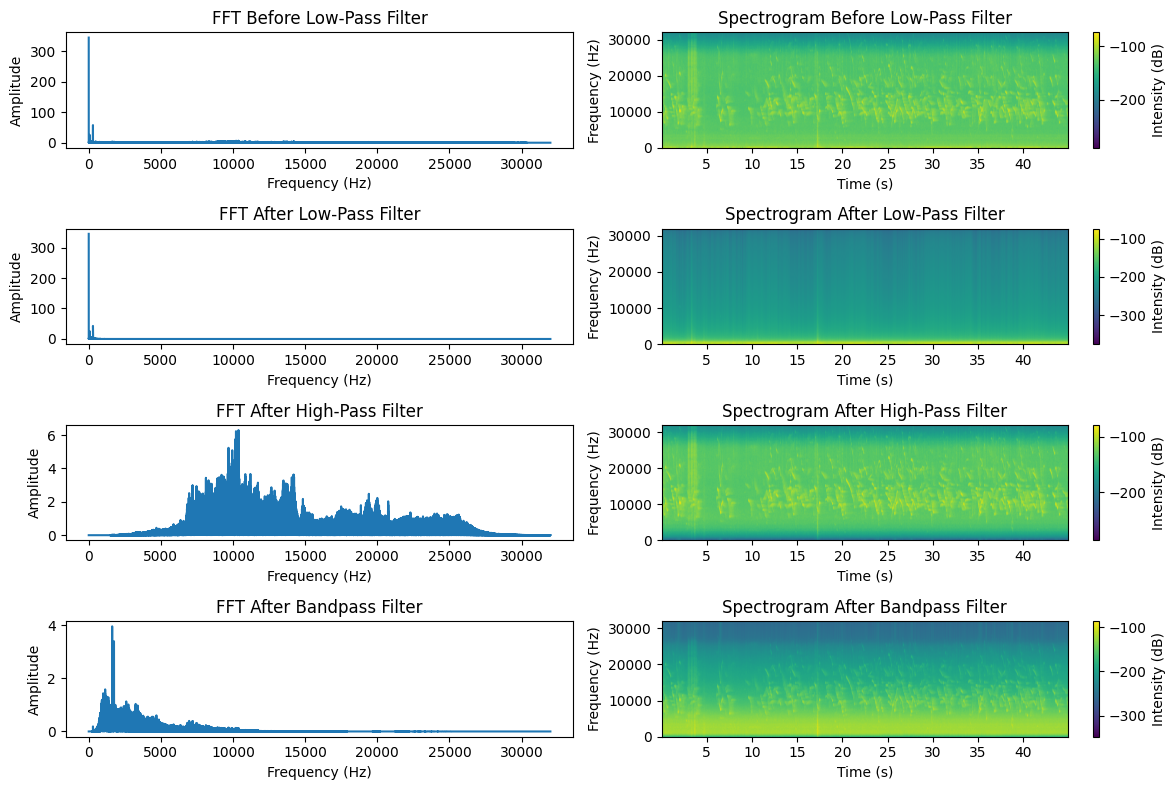

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

def butter_lowpass_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

def butter_highpass_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = lfilter(b, a, data)
    return y

def butter_bandpass_filter(data, lowcut, highcut, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    y = lfilter(b, a, data)
    return y

file_path = "/content/drive/MyDrive/hydrophone_data32.wav"
sample_rate, data = wavfile.read(file_path)

fft_result_original = np.fft.fft(data)
fft_freq_original = np.fft.fftfreq(len(fft_result_original), 1/sample_rate)

plt.figure(figsize=(12, 8))

plt.subplot(4, 2, 1)
plt.title("Orginal FFT")
plt.plot(fft_freq_original[:len(fft_result_original)//2], np.abs(fft_result_original[:len(fft_result_original)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 2)
plt.specgram(data, Fs=sample_rate, cmap='viridis', aspect='auto')
plt.title('Original Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')

lowpass_cutoff_frequency = 300

lowpass_filtered_data = butter_lowpass_filter(data, lowpass_cutoff_frequency, sample_rate)

fft_result_lowpass_filtered = np.fft.fft(lowpass_filtered_data)
fft_freq_lowpass_filtered = np.fft.fftfreq(len(fft_result_lowpass_filtered), 1/sample_rate)

plt.subplot(4, 2, 3)
plt.title("FFT After Low-Pass Filter")
plt.plot(fft_freq_lowpass_filtered[:len(fft_result_lowpass_filtered)//2], np.abs(fft_result_lowpass_filtered[:len(fft_result_lowpass_filtered)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 4)
plt.specgram(lowpass_filtered_data, Fs=sample_rate, cmap='viridis', aspect='auto')
plt.title('Spectrogram After Low-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')

highpass_cutoff_frequency = 5000

highpass_filtered_data = butter_highpass_filter(data, highpass_cutoff_frequency, sample_rate)

fft_result_highpass_filtered = np.fft.fft(highpass_filtered_data)
fft_freq_highpass_filtered = np.fft.fftfreq(len(fft_result_highpass_filtered), 1/sample_rate)

plt.subplot(4, 2, 5)
plt.title("FFT After High-Pass Filter")
plt.plot(fft_freq_highpass_filtered[:len(fft_result_highpass_filtered)//2], np.abs(fft_result_highpass_filtered[:len(fft_result_highpass_filtered)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 6)
plt.specgram(highpass_filtered_data, Fs=sample_rate, cmap='viridis', aspect='auto')
plt.title('Spectrogram After High-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')

bandpass_lowcut_frequency = 1000
bandpass_highcut_frequency = 5000

bandpass_filtered_data = butter_bandpass_filter(data, bandpass_lowcut_frequency, bandpass_highcut_frequency, sample_rate)

fft_result_bandpass_filtered = np.fft.fft(bandpass_filtered_data)
fft_freq_bandpass_filtered = np.fft.fftfreq(len(fft_result_bandpass_filtered), 1/sample_rate)

plt.subplot(4, 2, 7)
plt.title("FFT After Bandpass Filter")
plt.plot(fft_freq_bandpass_filtered[:len(fft_result_bandpass_filtered)//2], np.abs(fft_result_bandpass_filtered[:len(fft_result_bandpass_filtered)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 8)
plt.specgram(bandpass_filtered_data, Fs=sample_rate, cmap='viridis', aspect='auto')
plt.title('Spectrogram After Bandpass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')

wavfile.write("/content/drive/MyDrive/hydrophone_filtered_data.wav", sample_rate, np.int16(bandpass_filtered_data * 32767))

plt.tight_layout()
plt.show()

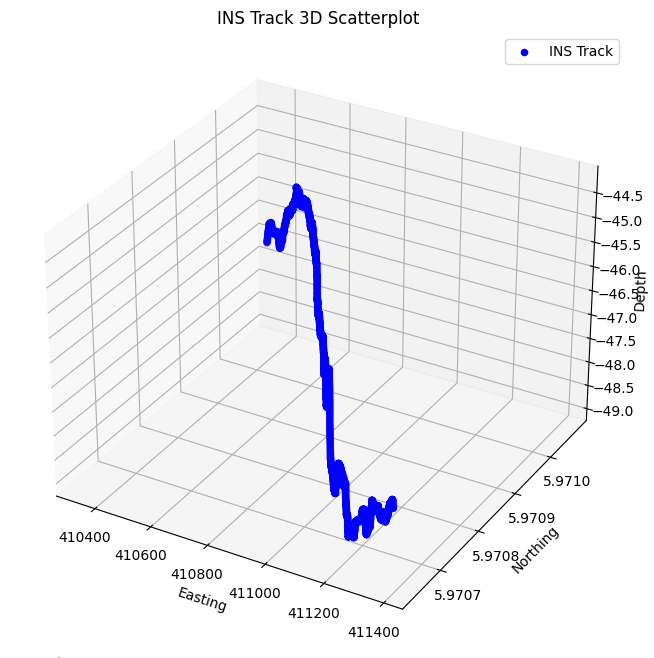

Total distance traveled: 1145.1337400832253 units


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator
import numpy as np

data = np.loadtxt('/content/drive/MyDrive/lab9.txt', delimiter='\t', skiprows=1)

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', label='INS Track')

ax.set_zlim(min(z), max(z) + 1)

ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Depth', labelpad=0.5)
ax.set_title('INS Track 3D Scatterplot')

ax.legend()

ax.zaxis.set_major_locator(MultipleLocator(0.5))

plt.show()

distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
total_distance = np.sum(distances)

print(f'Total distance traveled: {total_distance} units')